### Инициализация
Всякую сессию следует начинать с выполнения данного кода:

In [1]:
from __future__ import print_function  # Думаю для совместимости с Python 2 нужно сделать чуть больше... ;)
# 1.
%matplotlib nbagg
# %matplotlib inline
# 2.
import matplotlib as mpl
# mpl.use("nbAgg") # Это, или(XOR) %matplotlib <backend>. You should try svg, pdf, ...
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets
from IPython.display import clear_output, display

Здесь мы:
    1. Выбрали backend.
    2. Импортировали необходимые (и не очень) модули.

Backend можно выбрать с помощью функции `matplotlib.use()` или командой `%matplotlib <backend>` (команда чувствительна к регисту(!)). `%matplotlib --list` выдает список доступных команде backend'ов. Правда в моей версии IPython (4.0.1) в числе доступных backend'ов, например, заявляются `inline`, `nbagg` и `notebook`, на которыe сама же команда и ругается. В Jupyter Console команда не ругается на указанные backend'ы, но как они работают я не проверял. Jupyter Qt Console - еще один случай требующий разбирательства. Вызывать функцию `matplotlib.use()` нужно до импорта `pyplot`, `backends` или `pylab` (комадна `%matplotlib <backend>` срабатывает и после импорта `pyplot`). Для функции доступно большее число backend'ов (svg, pdf, ...).  
`nbagg` и `notebook` позволяют работать с графиками в интерактивном (как я его понимаю) режиме (начиная с matplotlib 1.4), что весьма удобно. Судя по значению, возвращаемому функцией `matplotlib.get_backend()`, `nbagg` и `notebook` - одно и то же. `inline` в интерактивном режиме работать не позволяет.

### Параметры среды
Посмотрим на некоторые параметры среды, в которой мы работаем.

In [3]:
print("NumPy version", np.__version__)
print("matplotlib version: %s" % mpl.__version__)
print("ipywidgets version: %s\n" % ipywidgets.__version__)

print("The name of the current backend:", mpl.get_backend())
print("matplotlib configuration file: %s\n" % mpl.matplotlib_fname())

print("Interactive:", (mpl.is_interactive(), plt.isinteractive()))
print("A list of existing figure numbers:", plt.get_fignums())
if plt.get_fignums():
# Если нет ни одного открытого изображения, то выполнение следующего выражения
# приведет к сзданию такового. (А зачем оно нам, если мы его тут не просили?)
    print("The current figure number:", plt.gcf().number)

NumPy version 1.10.1
matplotlib version: 1.5.0
ipywidgets version: 4.1.0

The name of the current backend: nbAgg
matplotlib configuration file: C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc

Interactive: (True, True)
A list of existing figure numbers: [1]
The current figure number: 1


In [ ]:
# Закрытие зависших неизвестно где изображений.
# tuple(map(plt.close, map(plt.figure, plt.get_fignums())))
throwaway = set(map(plt.close, plt.get_fignums()))
# plt.close(plt.figure(8))

### Пример 1
Следующий пример позаимствован из Matplotlib tutorial by Nicolas P. Rougier (доступно руководство [здесь](https://github.com/rougier/matplotlib-tutorial) или [здесь](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)). Также имеется несколько отличающаяся версия руководства ([здесь](http://www.scipy-lectures.org/intro/matplotlib/index.html)) в составе [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html).

<IPython.core.display.Javascript object>


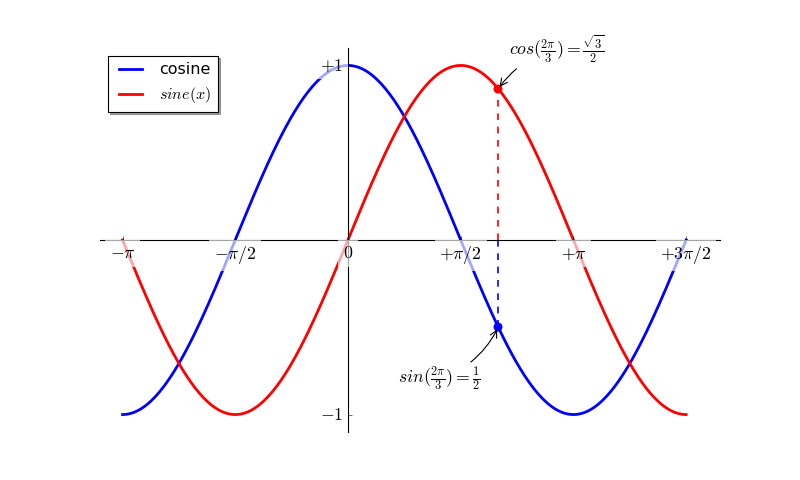

In [2]:
## Create a new fugure of size 10x6 inches, 80 dots per inch
plt.figure(figsize=(10, 6), dpi=80)
plt.subplot(111)


X = np.linspace(-np.pi, np.pi * 1.5, num=256, endpoint=True)
C, S = np.cos(X), np.sin(X)


plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label=r"$sine(x)$")


plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)


plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2],
          [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$+\pi/2$", r"$+\pi$", r"$+3\pi/2$"])
plt.yticks([-1, +1],
          [r"$-1$", r"$+1$"])


ax = plt.gca()  ## gca stands for 'get current axis'
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_position(("data", 0))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("data", 0))


plt.legend(loc="upper left", frameon=True, shadow=True)


t = 2*np.pi/3
plt.plot([t, t], [0, np.cos(t)], color="blue", linewidth=1.5, linestyle="--")
plt.scatter([t], [np.cos(t)], 50, color="blue")

plt.annotate(r"$sin(\frac{2\pi}{3})=\frac{1}{2}$",
            xy=(t, np.cos(t)), xycoords="data",
            xytext=(-90, -50), textcoords="offset points", fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t], [0, np.sin(t)], color="red", linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.sin(t), ], 50, color="red")

plt.annotate(r"$cos(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$",
            xy=(t, np.sin(t)), xycoords="data",
            xytext=(+10, +30), textcoords="offset points", fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor="white", edgecolor='None', alpha=0.65))


plt.savefig(r".\figures\matplotlib_and_ipywidgets_01.svg", dpi=72)
plt.show()

# http://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes
# plt.close(plt.figure(1))

### Пример 2
Простейший случай использования `ipywidgets`.

In [4]:
def func(x, y):
    return (x, y)

throwaway = ipywidgets.interact(func, x=(4, 20, 2), y=(-7.0, 3.5, 0.5))

(12, -2.0)